# SLAM Unit C
In this unit, we will start using discrete distributions to model the uncertainty of a robot's state. We will figure out what happens to them if the robot moves, and also, what happens if the robot uses a measurement to improve the knowledge about its state.

Combining movement and measurement, we will arrive at a very important *filter*, which is the basis of all filters we cover here. It is named the *Bayes filter*, because it uses *Bayesian statistics*, named after [Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes).

Then, we attempt to replace the storage-intensive discrete distributions by normal distributions, for which it suffices to store the first and second moments. That is, we keep the concept of the Bayes filter, but replace the discrete (histogram) distribution (requiring to specify one probability for every cell) by the normal density (requiring only two scalar numbers: the mean and the variance). By this, we arrive at the very famous *Kalman filter*, named after [Rudolf E. Kálmán](https://en.wikipedia.org/wiki/Rudolf_E._K%C3%A1lm%C3%A1n).

## Discrete distributions

In [61]:
# If you don't see a video below, run this cell.
# YouTube = True  # Uncomment to get YouTube videos instead of TIB AV.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/6JEN_5rp6bI" if "YouTube" in globals() else "//av.tib.eu/player/48989",
       width=560, height=315)

### Assignment: shift a discrete distribution (10 Points).
As shown in the video, the task is to move the distribution, while keeping its shape.

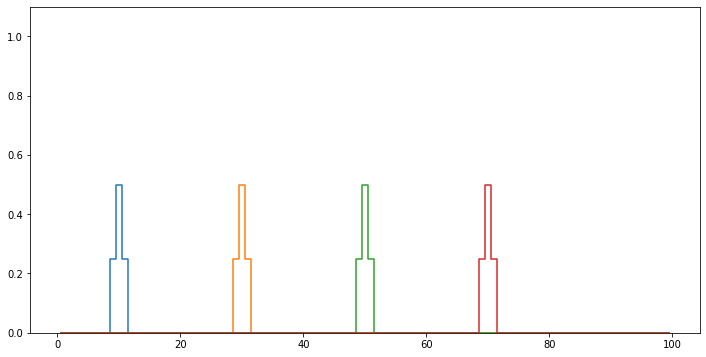

In [147]:
# Move a distribution (in x) by a given amount (an integer). 移动分布
# 06_a_move_distribution
from pylab import plot, show, ylim, plt
from distribution import *

plt.rcParams['figure.figsize'] = (12, 6)  # Change this to affect the plots in this and all following cells.

def move(distribution, delta):
    """Returns a Distribution that has been moved (x-axis) by the amount of
       delta."""
    # YOUR CODE HERE
    offset_new = distribution.offset + delta
    values_new = distribution.values
    distribution = Distribution(offset_new,values_new)
    
    #raise NotImplementedError()
    return distribution

if __name__ == '__main__':
    # List of movements: move 3 times by 20.
    moves = [20, 20, 20]

    # Start with a known position: probability 1.0 at position 10.
    position = Distribution.triangle(10,2)
    plot(position.plotlists(0,100)[0], position.plotlists(0,100)[1],
         drawstyle='steps')

    # Now move and plot.
    for m in moves:
        position = move(position, m)
        plot(position.plotlists(0,100)[0], position.plotlists(0,100)[1],
             drawstyle='steps')
    ylim(0.0, 1.1)
    show()

In [144]:
from random import randint, random
def public_test(the_move):
    for experiment in range(20):
        # Invent a distribution.
        num_values = randint(1, 10)
        values = [ random()+0.001 for i in range(num_values) ]
        offset = randint(-100,100)
        # For fun, add a zero somewhere.
        if num_values > 1 and random() > 0.5:
            values[randint(0, num_values-1)] = 0.0
        initial_distribution = Distribution(offset, values)
        initial_distribution.normalize()

        # Now, shift this.
        delta = randint(-5,5)  # Random shift.
        copy = Distribution(initial_distribution.offset,
                            initial_distribution.values)
        # Call the function to be tested.
        moved_distribution = the_move(copy, delta)

        # Check that the values are the same.
        idx = None
        for i, val in enumerate(initial_distribution.values,
                                start=initial_distribution.offset):
            if val != moved_distribution.value(i+delta):
                idx = (i, i+delta)
                break
        if idx is None:
            for j, val in enumerate(moved_distribution.values,
                                    start=moved_distribution.offset):
                if val != initial_distribution.value(j-delta):
                    idx = (j-delta, j)
                    break
        if idx is not None:
            print("Error for original distribution:")
            print(initial_distribution)
            print("Move =", delta)
            print("Result of move is:")
            print(moved_distribution)
            print("Original distribution [%d] = %f" %\
                  (idx[0], initial_distribution.value(idx[0])))
            print("Moved distribution    [%d] = %f" %\
                  (idx[1], moved_distribution.value(idx[1])))
            return(False)        
    return True
assert(public_test(move))

### Introducing the movement error.

In [64]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/mdzgKpRRd58" if "YouTube" in globals() else "//av.tib.eu/player/48990",
       width=560, height=315)

In [134]:
# Write here the number of possible positions on the next level of the tree,
# in words (use "zero" or "one" or "two" or ... or "one million").
# Hint: it's less than one million.
number_of_positions = "one million"
# YOUR CODE HERE

number_of_positions = "five"
#raise NotImplementedError()

In [140]:
from hashlib import shake_128
def public_test(the_number_of_positions):
    m = shake_128()
    m.update(the_number_of_positions.strip().lower().encode())
    if m.hexdigest(4)=='28ba209d':
        return True
    else:
        print("Oh no! Your answer is wrong!")
        return False
assert(public_test(number_of_positions))

### Programming assignment: convolution of distributions (15 Points).

In [130]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/YhxdZt9rzRA" if "YouTube" in globals() else "//av.tib.eu/player/48991",
       width=560, height=315)

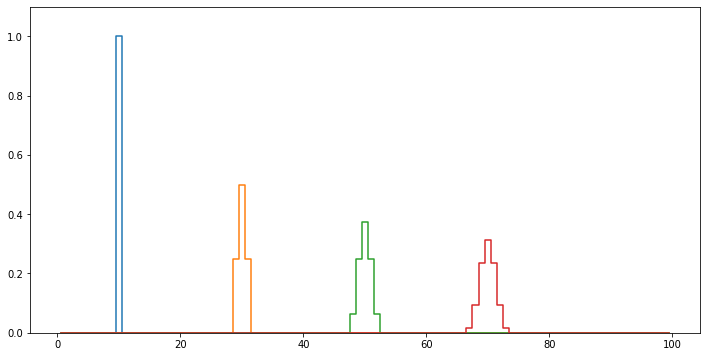

In [124]:
# Instead of moving a distribution, move (and modify) it using a convolution.
# 06_b_convolve_distribution
from pylab import plot, show, ylim
from distribution import *

def convolve(a, b):
    """Convolve distribution a and b and return the resulting new distribution."""
    # YOUR CODE HERE
    
        
    offset = a.offset + b.offset;
    distri_list = []
    
    for i in a.values:
        distri_value = []
        for j in b.values:
            distri_value.append(i*j)
        distri_list.append(Distribution(offset, distri_value))
        offset += 1
    
    result  = Distribution.sum(distri_list)
#     raise NotImplementedError()
    return result

if __name__ == '__main__':
    arena = (0,100)

    # Move 3 times by 20.
    moves = [20] * 3

    # Start with a known position: probability 1.0 at position 10.
    position = Distribution.unit_pulse(10)
    plot(position.plotlists(*arena)[0], position.plotlists(*arena)[1],
         drawstyle='steps')

    # Now move and plot.
    for m in moves:
        move_distribution = Distribution.triangle(m, 2)
        position = convolve(position, move_distribution)
        plot(position.plotlists(*arena)[0], position.plotlists(*arena)[1],
             drawstyle='steps')

    ylim(0.0, 1.1)
    show()

In [117]:
# Some easy test cases made by hand to help debugging.
def public_test_1(the_convolve): 
    test_cases = [
        (Distribution(11, [1,2,1]),
         Distribution(-3, [1]),
         Distribution(8, [1,2,1])),

        (Distribution(-10, [1]),
         Distribution(-3, [1,2,1]),
         Distribution(-13, [1,2,1])),
        
        (Distribution(4, [1,2,1]),
         Distribution(-1, [1,5,2]),
         Distribution(3, [1,7,13,9,2])),

        (Distribution(-4, [1,2]),
         Distribution(1, [1,5,4,3]),
         Distribution(-3, [1,7,14,11,6])),
    ]

    for d1, d2, ref in test_cases:
        d1.normalize()
        d2.normalize()
        # Call function to be tested.
        res = the_convolve(d1, d2)

        # Check if normalized.
        if abs(sum(res.values)-1) > 1e-6:
            print("Test 1 error: distribution should sum up to 1.")
            return False

        # Check values.
        ref.normalize()
        for i in range(ref.start(), ref.stop()):
            if abs(ref.value(i)-res.value(i)) > 1e-6:
                print("Test 1 error: wrong result for distribution 1:")
                print(d1)
                print("and distribution 2:")
                print(d2)
                return False

    return True

# Some more random test cases.
from random import randint, random
import numpy as np
def public_test_2(the_convolve):
    for experiment in range(50):
        # Invent two distributions.
        d1 = Distribution(randint(-20,20),
                          [random()+0.0001 for i in range(randint(1,5))])
        d1.normalize()
        d2 = Distribution(randint(-20,20),
                          [random()+0.0001 for i in range(randint(1,5))])
        d2.normalize()

        # Call function to be tested.
        res = the_convolve(d1,d2)
        # Check if normalized.
        if abs(sum(res.values)-1) > 1e-6:
            print("Test 2 error: distribution should sum up to 1.")
            return False

        # Check result.
        m = np.rot90(np.multiply(*np.meshgrid(d1.values, d2.values)),-1)
        v = [np.trace(m,offset=k) for k in range(m.shape[1]-1,-m.shape[0],-1)]
        for i, val in enumerate(v, d1.offset+d2.offset):
            if abs(res.value(i)-val) > 1e-6:
                print("Test 2 error: wrong result for distribution 1:")
                print(d1)
                print("and distribution 2:")
                print(d2)
                return False
    return True
assert(public_test_1(convolve))
assert(public_test_2(convolve))

### Integrating the measurement.

In [70]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/YXraP_l2g_Y" if "YouTube" in globals() else "//av.tib.eu/player/48992",
       width=560, height=315)

In [71]:
# Write here the required operation, from the choices in the video, i.e. "Add", or "Subtract", etc.
required_operation = "Loop"
# YOUR CODE HERE

required_operation = "Multiply"

# raise NotImplementedError()

In [113]:
from hashlib import shake_128
def public_test(the_required_operation):
    m = shake_128()
    m.update(the_required_operation.strip().lower().encode())
    if m.hexdigest(4)=='0708d00f':
        return True
    else:
        print("Oh no! Your answer is wrong!")
        return False
assert(public_test(required_operation))

In [114]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/olOGM0bv1BA" if "YouTube" in globals() else "//av.tib.eu/player/48993",
       width=560, height=315)

### Programming assignment: multiplication of distributions (15 Points).

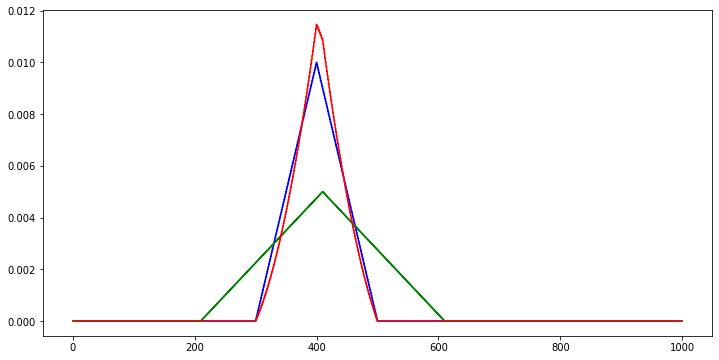

In [74]:
# Multiply a distribution by another distribution.
# 06_c_multiply_distribution
from pylab import plot, show
from distribution import *

def multiply(a, b):
    """Multiply two distributions and return the resulting distribution."""
    # YOUR CODE HERE
    
    start = min([a.start(), b.start()])
    stop = max([a.stop(), b.stop()])
    values = []
    
    for i in range(start, stop):
        values.append(a.value(i) * b.value(i))
    
    result_distri = Distribution(start, values)
    result_distri.normalize()
    d = result_distri


#     raise NotImplementedError()
    return d

if __name__ == '__main__':
    arena = (0,1000)

    # Here is our assumed position. Plotted in blue.
    position_value = 400
    position_error = 100
    position = Distribution.triangle(position_value, position_error)
    plot(position.plotlists(*arena)[0], position.plotlists(*arena)[1],
         color='b', drawstyle='steps')

    # Here is our measurement. Plotted in green.
    # That is what we read from the instrument.
    measured_value = 410
    measurement_error = 200
    measurement = Distribution.triangle(measured_value, measurement_error)
    plot(measurement.plotlists(*arena)[0], measurement.plotlists(*arena)[1],
         color='g', drawstyle='steps')

    # Now, we integrate our sensor measurement. Result is plotted in red.
    position_after_measurement = multiply(position, measurement)
    plot(position_after_measurement.plotlists(*arena)[0],
         position_after_measurement.plotlists(*arena)[1],
         color='r', drawstyle='steps')

    show()

In [112]:
# Some easy test cases made by hand to help debugging.
def public_test_1(the_multiply):
    test_cases = [
        # Single element return.
        (Distribution(7, [1,2,1]),
         Distribution(7, [1]),
         Distribution(7, [1])),
        # Single element return.
        (Distribution(7, [1,2,1]),
         Distribution(8, [1]),
         Distribution(8, [1])),
        # Overlap 1.
        (Distribution(-11, [1,2,1]),
         Distribution(-13, [1,2,3]),
         Distribution(-11, [1])),
        # Overlap 2.
        (Distribution(-11, [1,2,1]),
         Distribution(-12, [1,2,3]),
         Distribution(-11, [1,3])),
        # Overlap 3.
        (Distribution(-11, [1,2,1]),
         Distribution(-11, [1,2,3]),
         Distribution(-11, [1,4,3])),
    ]

    for d1, d2, ref in test_cases:
        d1.normalize()
        d2.normalize()
        # Call function to be tested.
        res = the_multiply(d1, d2)

        # Check if normalized.
        if abs(sum(res.values)-1) > 1e-6:
            print("Test 1 error: distribution should sum up to 1.")
            return False

        # Check values.
        ref.normalize()
        for i in range(ref.start(), ref.stop()):
            if abs(ref.value(i)-res.value(i)) > 1e-6:
                print("Test 1 error: wrong result for distribution 1:")
                print(d1)
                print("and distribution 2:")
                print(d2)
                return False
    return True

# Some more random test cases.
from random import randint, random
import numpy as np
from scipy.sparse import coo_matrix
def public_test_2(the_multiply):
    for experiment in range(50):
        # Invent two distributions.
        dists = [ Distribution(randint(0,10),
                  [random()+0.0001 for _ in range(randint(1,15))]) \
                  for _ in range(2) ]
        map(lambda d: d.normalize(), dists)

        # Check if there are nonzero values at all. If so, skip.
        stop = max(d.stop() for d in dists)
        m = [ coo_matrix((d.values, (range(d.start(),d.stop()),
              np.zeros(len(d.values)))), shape=(stop,1)) for d in dists ]
        v = m[0].multiply(m[1])
        s = v.sum()
        if s == 0: continue

        # Call function to be tested.
        res = the_multiply(*dists)
        # Check if normalized.
        if abs(sum(res.values)-1) > 1e-6:
            print("Test 2 error: distribution should sum up to 1.")
            return False

        # Check each element.
        for i in range(v.shape[0]):
            if abs(res.value(i)-v[i,0]/s) > 1e-6:
                print("Test 2 error: wrong result for distribution 1:")
                print(dists[0])
                print("and distribution 2:")
                print(dists[1])
                return False
    return True
assert(public_test_1(multiply))
assert(public_test_2(multiply))

## The Bayes filter
Now we will combine our two operations. This is called the Bayes filter. If it is used in conjunction with our discrete distributions (having one probability for each discrete location) it is also called the **histogram filter**.

In [111]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/yCYybXmuVEU" if "YouTube" in globals() else "//av.tib.eu/player/48994",
       width=560, height=315)

### First let's reproduce the result from the video.
You are welcome to perform the experiments shown in the video, by playing with the widths of the distributions, or commenting out the correction step.

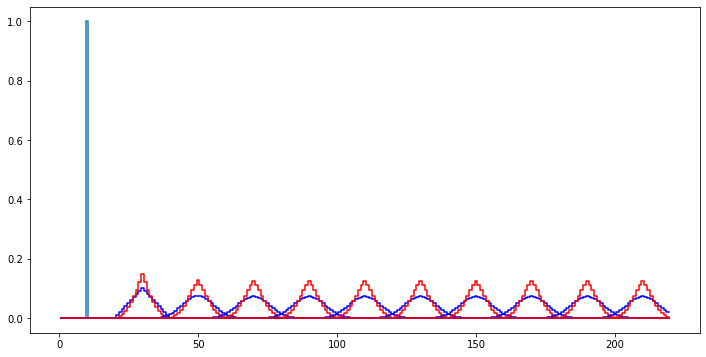

In [110]:
# Histogram implementation of a bayes filter - combines
# convolution and multiplication of distributions, for the
# movement and measurement steps.
# 06_d_histogram_filter
from pylab import plot, show, ylim
from distribution import *

# No need to copy your previous solutions to here.

if __name__ == '__main__':
    arena = (0,220)

    # Start position. Exactly known - a unit pulse.
    start_position = 10
    position = Distribution.unit_pulse(start_position)
    plot(position.plotlists(*arena)[0], position.plotlists(*arena)[1],
         drawstyle='steps')

    # Movement data.
    controls  =    [ 20 ] * 10

    # Measurement data. Assume (for now) that the measurement data
    # is correct. - This code just builds a cumulative list of the controls,
    # plus the start position.
    p = start_position
    measurements = []
    for c in controls:
        p += c
        measurements.append(p)

    # This is the filter loop.
    for i in range(len(controls)):
        # Move, by convolution. Also termed "prediction".
        control = Distribution.triangle(controls[i], 10)
        position = convolve(position, control)
        plot(position.plotlists(*arena)[0], position.plotlists(*arena)[1],
             color='b', drawstyle='steps')

        # Measure, by multiplication. Also termed "correction".
        measurement = Distribution.triangle(measurements[i], 10)
        position = multiply(position, measurement)
        plot(position.plotlists(*arena)[0], position.plotlists(*arena)[1],
             color='r', drawstyle='steps')

    show()

### Here is the *cleanedup* version shown in the video.
You are welcome to replace the `Distribution.triangle` by `Distribution.gaussian`, as demonstrated in the above video.

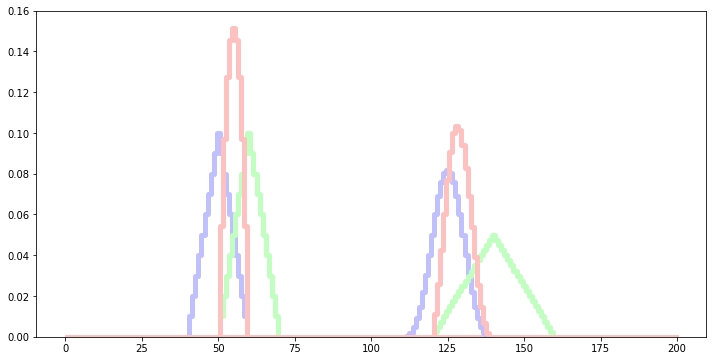

In [109]:
# Histogram implementation of a bayes filter - combines
# convolution and multiplication of distributions, for the
# movement and measurement steps.
# 06_e_histogram_filter_cleanedup
from distribution import *
from pylab import plot, show, ylim

# No need to copy your previous solutions to here.

#
# Helpers.
#
def histogram_plot(prediction, measurement, correction):
    """Helper to draw all curves in each filter step."""
    plot(prediction.plotlists(*arena)[0], prediction.plotlists(*arena)[1],
         color='#C0C0FF', drawstyle='steps', linewidth=5)
    plot(measurement.plotlists(*arena)[0], measurement.plotlists(*arena)[1],
         color='#C0FFC0', drawstyle='steps', linewidth=5)    
    plot(correction.plotlists(*arena)[0], correction.plotlists(*arena)[1],
         color='#FFC0C0', drawstyle='steps', linewidth=5)

#
# Histogram filter step.
#
def histogram_filter_step(belief, control, measurement):
    """Bayes filter step implementation: histogram filter."""
    # These two lines is the entire filter!
    prediction = convolve(belief, control)
    correction = multiply(prediction, measurement)

    # Return both prediction and corrrection. This is for plotting only.
    # Normally, this would just return the correction.
    return (prediction, correction)

#
# Main
#
if __name__ == '__main__':
    arena = (0,200)
    Dist = Distribution.triangle  # Distribution.triangle or Distribution.gaussian.

    # Start position. Well known, so the distribution is narrow.
    position = Dist(10, 1)

    # Controls and measurements.
    controls = [ Dist(40, 10), Dist(70, 10) ]
    measurements = [ Dist(60, 10), Dist(140, 20) ]

    # This is the filter loop.
    for i in range(len(controls)):
        # Call the filter step. The corrected distribution becomes the new position.
        (prediction, position) = histogram_filter_step(position, controls[i], measurements[i])
        histogram_plot(prediction, measurements[i], position)

    ylim(0.0, 0.16)
    show()

In [108]:
# Finally, here is the question raised at the end of the above video.
# Is it all Gaussians? Answer with "True" or "False"
its_all_gaussians = "True"
# YOUR CODE HERE
#raise NotImplementedError()

In [104]:
from hashlib import shake_128
m = shake_128()
m.update(its_all_gaussians.strip().lower().encode())
assert(m.hexdigest(4)=="f69a8740")

## The Gaussian distribution

In [103]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/JNCkmzec-zk" if "YouTube" in globals() else "//av.tib.eu/player/48995",
       width=560, height=315)

In [101]:
# Please answer the question from the end of the video:
# "What is the value of the shown integral?"
# From the following lines, uncomment the correct solution.
the_value_of_the_integral = "depends on sigma"
# the_value_of_the_integral = "is 1.0"
# the_value_of_the_integral = "depends on mu"
# the_value_of_the_integral = "depends on sigma"
# the_value_of_the_integral = "depends on both, mu and sigma"
# YOUR CODE HERE
#raise NotImplementedError()

In [102]:
from hashlib import shake_128
m = shake_128()
m.update(the_value_of_the_integral.strip().lower().encode())
assert(m.hexdigest(4)=="ef431e7a")

## Towards the Kalman filter
### First, the correction step.

In [100]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/kNLehf7vs5w" if "YouTube" in globals() else "//av.tib.eu/player/48996",
       width=560, height=315)

In [99]:
# Please answer the question from the end of the video:
# "Will the result be normal distributed?"
# Answer with "Yes" or "No"
the_result_will_be_normal_distributed = "Yes"
# YOUR CODE HERE
#raise NotImplementedError()

In [98]:
from hashlib import shake_128
m = shake_128()
m.update(the_result_will_be_normal_distributed.strip().lower().encode())
assert(m.hexdigest(4)=="f94b1f4a")

### Next, the prediction step.

In [91]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/SEh7vst6XPc" if "YouTube" in globals() else "//av.tib.eu/player/48997",
       width=560, height=315)

## Finally: your first Kalman filter!
### Programming assignment: implement the Kalman filter (15 Points).

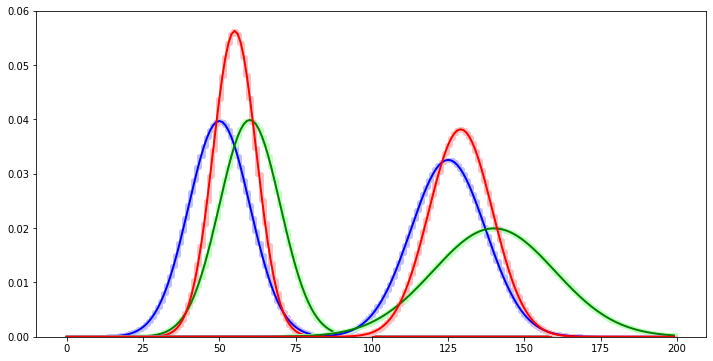

In [90]:
# Comparison of the Kalman filter and the histogram filter.
# 06_f_kalman_vs_histogram_filter
from distribution import *
from math import sqrt
from pylab import plot, show, ylim
from scipy.stats import norm

# No need to paste any previous solution here.

#
# Helpers.
#
class Density:
    def __init__(self, mu, sigma2):
        self.mu = float(mu)
        self.sigma2 = float(sigma2)

def histogram_plot(prediction, measurement, correction):
    """Helper to draw all curves in each filter step."""
    plot(prediction.plotlists(*arena)[0], prediction.plotlists(*arena)[1],
         color='#C0C0FF', drawstyle='steps', linewidth=5)
    plot(measurement.plotlists(*arena)[0], measurement.plotlists(*arena)[1],
         color='#C0FFC0', drawstyle='steps', linewidth=5)    
    plot(correction.plotlists(*arena)[0], correction.plotlists(*arena)[1],
         color='#FFC0C0', drawstyle='steps', linewidth=5)

def kalman_plot(prediction, measurement, correction):
    """Helper to draw all curves in each filter step."""
    plot([norm.pdf(x, prediction.mu, sqrt(prediction.sigma2))
          for x in range(*arena)], color = 'b', linewidth=2)
    plot([norm.pdf(x, measurement.mu, sqrt(measurement.sigma2))
          for x in range(*arena)], color = 'g', linewidth=2)
    plot([norm.pdf(x, correction.mu, sqrt(correction.sigma2))
          for x in range(*arena)], color = 'r', linewidth=2)

#
# Histogram filter step.
#
def histogram_filter_step(belief, control, measurement):
    """Bayes filter step implementation: histogram filter."""
    # These two lines is the entire filter!
    prediction = convolve(belief, control)
    correction = multiply(prediction, measurement)

    return (prediction, correction)

#
# Kalman filter step.
#
def kalman_filter_step(belief, control, measurement):
    """Bayes filter step implementation: Kalman filter."""
    # Prediction. Replace the following line by your implementation.
    #prediction = Density(belief.mu + 10.0, belief.sigma2 + 100.0)
    prediction = Density(belief.mu + control.mu, belief.sigma2 + control.sigma2)

    # Correction. Replace the following line by your implementation.
    #correction = prediction

    # YOUR CODE HERE
    
    k = prediction.sigma2 / (prediction.sigma2 + measurement.sigma2)
    mu = prediction.mu + k*(measurement.mu - prediction.mu)
    sigma2 = (1.0 - k)*prediction.sigma2
    correction = Density(mu, sigma2)
    
    #raise NotImplementedError()

    return (prediction, correction)

#
# Main
#
if __name__ == '__main__':
    arena = (0,200)
    Dist = Distribution.gaussian  # Distribution.triangle or Distribution.gaussian.

    # Start position. Well known, so the distribution is narrow.
    position = Dist(10, 1)      # Histogram
    position_ = Density(10, 1)  # Kalman

    # Controls and measurements.
    controls = [ Dist(40, 10), Dist(70, 10) ]               # Histogram
    controls_ = [ Density(40, 10**2), Density(70, 10**2) ]  # Kalman
    measurements = [ Dist(60, 10), Dist(140, 20) ]               # Histogram
    measurements_ = [ Density(60, 10**2), Density(140, 20**2) ]  # Kalman

    # This is the filter loop.
    for i in range(len(controls)):
        # Histogram
        (prediction, position) = histogram_filter_step(position, controls[i], measurements[i])
        histogram_plot(prediction, measurements[i], position)
        # Kalman
        (prediction_, position_) = kalman_filter_step(position_, controls_[i], measurements_[i])
        kalman_plot(prediction_, measurements_[i], position_)

    ylim(0.0, 0.06)
    show()

In [89]:
def public_test(the_kalman_filter_step):
    test_cases = [
        # belief, control, measurement, predicted, corrected.
        # Each tuple is (mu, sigma2).
        ((1,1), (2,4), (5,5), (3,5), (4.0,2.5)),
        ((-1,2), (5,2), (8,1), (4,4), (7.2,0.8)),
        ((1.23,4.56), (2.34,5.67), (5.67,7.89), (3.57, 10.23),
         (4.755596026490066, 4.454453642384107)),
    ]

    for belief, control, measurement, ref_pred, ref_corr in test_cases:
        # Call function to test.
        pred, corr = the_kalman_filter_step(
            Density(*belief), Density(*control), Density(*measurement))
        result = (pred.mu, pred.sigma2, corr.mu, corr.sigma2)
        ref = ref_pred + ref_corr        
        if max(abs(a-b) for a, b in zip(result, ref)) > 1e-6:
            print("Wrong result for case: belief", belief,
                  "control", control, "measurement", measurement)
            return False
    return True
assert(public_test(kalman_filter_step))

## Conclusions and congratulations!

In [86]:
# If you don't see a video below, run this cell.
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/zRuXKGNIb4o" if "YouTube" in globals() else "//av.tib.eu/player/48998",
       width=560, height=315)

### Here is one last question (2 Points):
Sometimes you will encounter the notions of *parametric filters* and *non-parametric filters*. Considering the histogram filter and the Kalman filter, which is true?

In [87]:
# Comment out the correct solution.
the_answer_to_the_last_question = "The Kalman filter is parametric, the histogram filter isn't."
#the_answer_to_the_last_question = "Neither of the two filters are parametric."
#the_answer_to_the_last_question = "The histogram filter is parametric, the Kalman filter isn't."
#the_answer_to_the_last_question = "The Kalman filter is parametric, the histogram filter isn't."
#the_answer_to_the_last_question = "Both, histogram and Kalman filters are parametric."
# YOUR CODE HERE
#raise NotImplementedError()

In [88]:
from hashlib import shake_128
m = shake_128()
m.update(the_answer_to_the_last_question.strip().lower().encode())
assert(m.hexdigest(4)=="453f9dc6")